<center>
  <h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid black;">Mall Customers Segmentation</h1>
</center>

<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3.0px; background: #003380; border: 10px solid #80ffff;">
    <h1>TABLE OF CONTENTS</h1>
</div>

* [Import Libraries](#0)
* [Read Data](#1)
* [Data Visualization](#2)
* [Model](#3)
  * [KMeans](#3.1)
  * [AgglomerativeClustering](#3.2)

    

<a id="0.1"></a>
## <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #0059b3; border-bottom: 8px solid #e6e6e6" > Import Libraries<br><div> 


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<a id="0.1"></a>
## <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #0059b3; border-bottom: 8px solid #e6e6e6" >Read Data<br><div> 


In [37]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [40]:
data.describe(include=object).transpose()

,count,unique,top,freq
Gender,200,2,Female,112


In [41]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


<a id="0.1"></a>
## <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #0059b3; border-bottom: 8px solid #e6e6e6" >Data Visualization<br><div> 

In [43]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

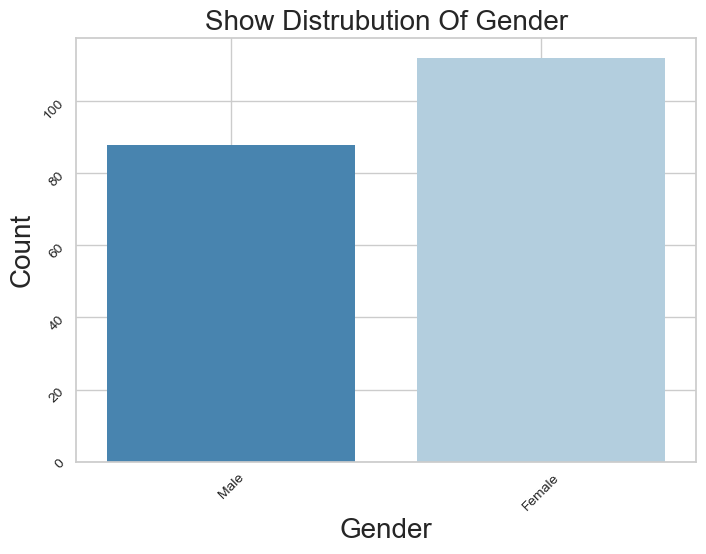

In [44]:
sns.countplot(x=data['Gender'],palette='Blues_r')
plt.title('Show Distrubution Of Gender',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

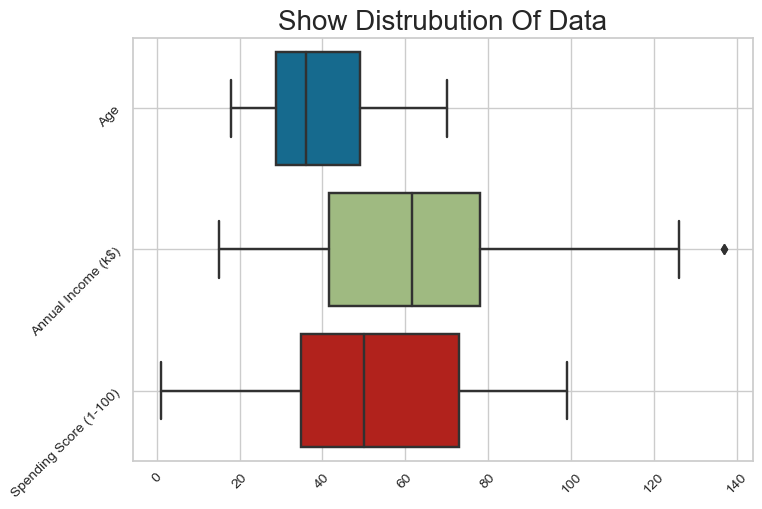

In [45]:
sns.boxplot(data=data.iloc[:,2:],orient='h')
plt.title('Show Distrubution Of Data',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_2216\3000344277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual Income (k$)'][data['Annual Income (k$)'] < min] =min
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_2216\3000344277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual Income (k$)'][data['Annual Income (k$)'] > max] = max


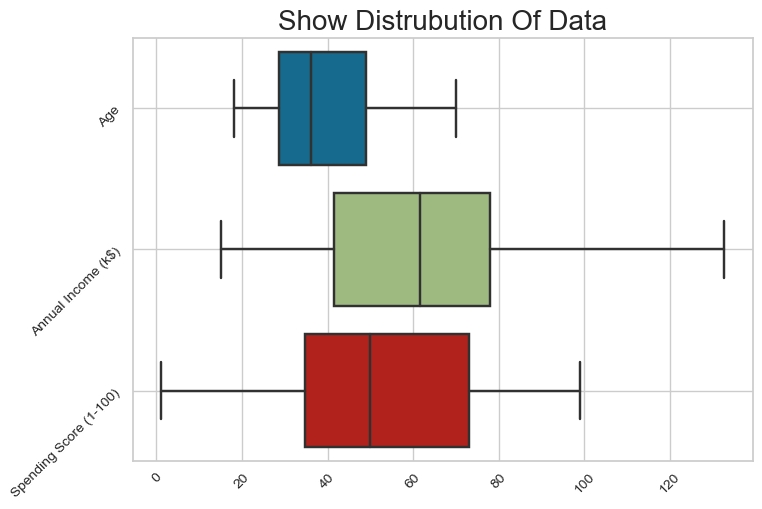

In [46]:
q75,q25 = np.percentile(data['Annual Income (k$)'],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
data['Annual Income (k$)'][data['Annual Income (k$)'] < min] =min
data['Annual Income (k$)'][data['Annual Income (k$)'] > max] = max
sns.boxplot(data=data.iloc[:,2:],orient='h')
plt.title('Show Distrubution Of Data',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

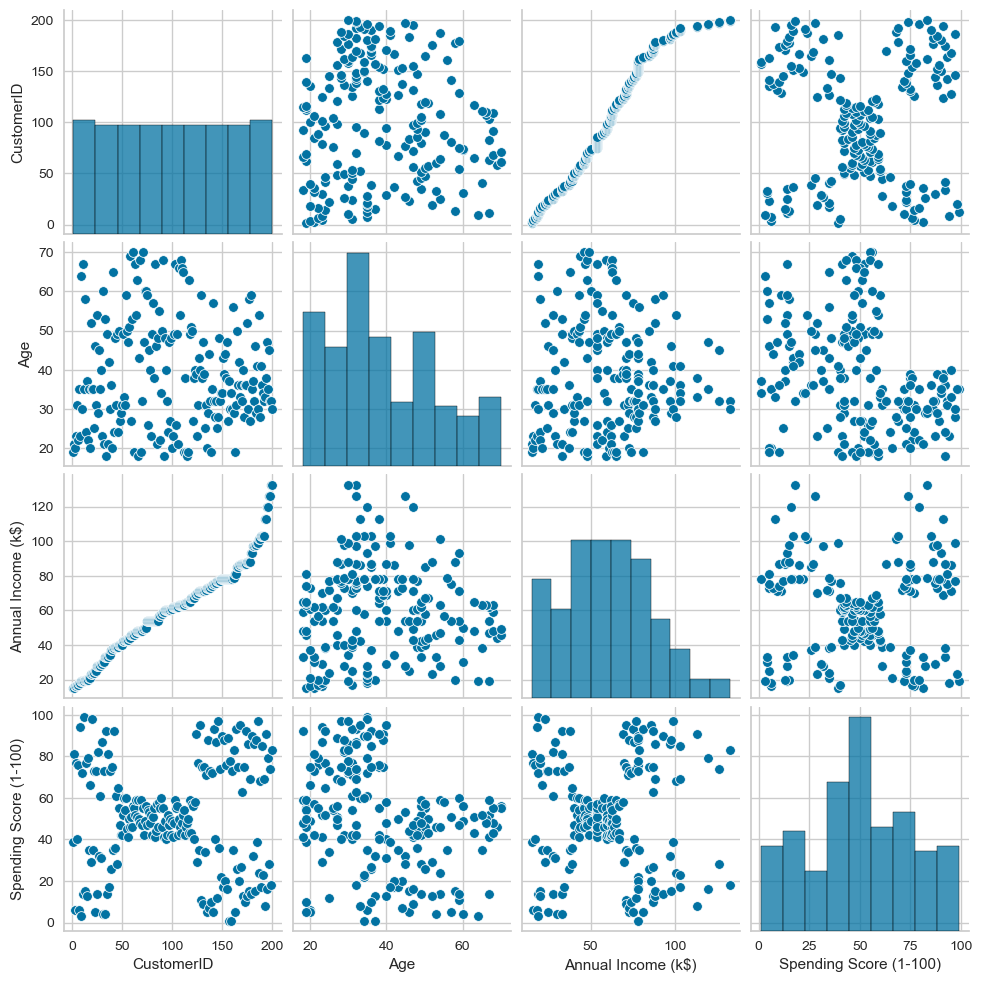

In [47]:
sns.pairplot(data = data) 
plt.show()

<a id="0.1"></a>
## <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #0059b3; border-bottom: 8px solid #e6e6e6" >Model<br><div> 


In [48]:
X=data.iloc[:,3:]
key=X.columns
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
X=pd.DataFrame(X,columns=key)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008493,0.051020
3,0.008493,0.775510
4,0.016985,0.397959


d:\New folder (2)\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


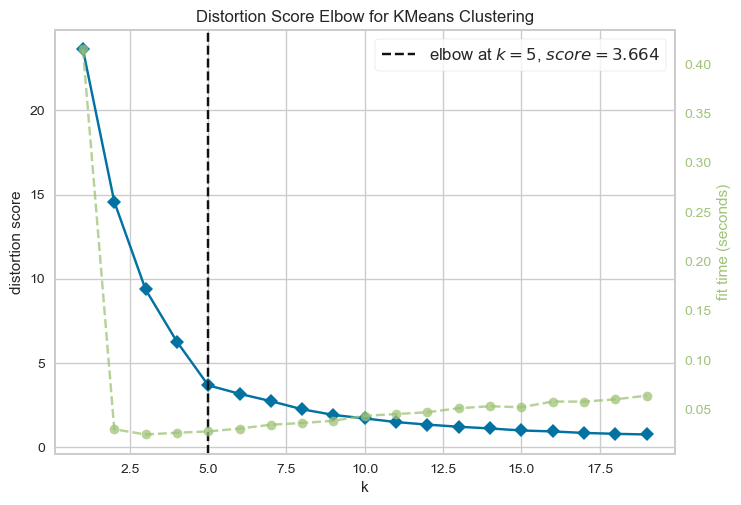

In [49]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X)
visualizer.show()
plt.show()

In [50]:
#Number Of Cluster 5
KMeansModel = KMeans(n_clusters=5,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[0.09600295 0.20319432]
 [0.60661985 0.82783883]
 [0.34221908 0.49508692]
 [0.62062481 0.16443149]
 [0.0911021  0.79962894]]
KMeansModel labels are :  [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
KMeansModel intertia is :  3.664488816292179
KMeansModel No. of iteration is :  3


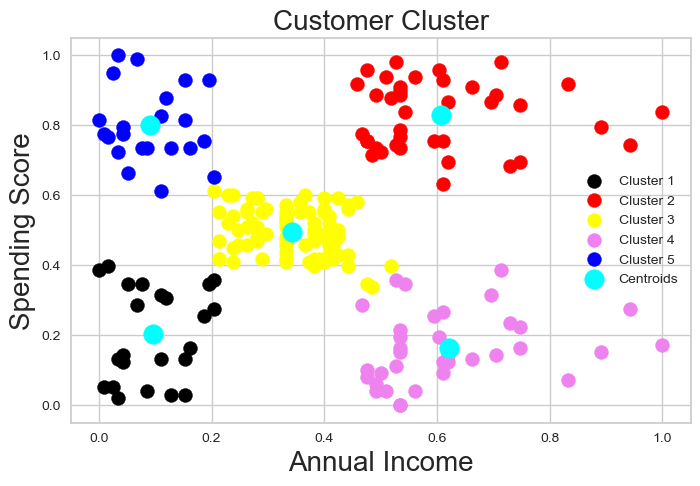

In [51]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[y==0,0], X.iloc[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X.iloc[y==1,0], X.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X.iloc[y==2,0], X.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X.iloc[y==3,0], X.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
plt.scatter(X.iloc[y==4,0], X.iloc[y==4,1], s=100, c='blue', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Cluster',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

In [52]:
silhouette_score(X, y)

0.5602376471765546

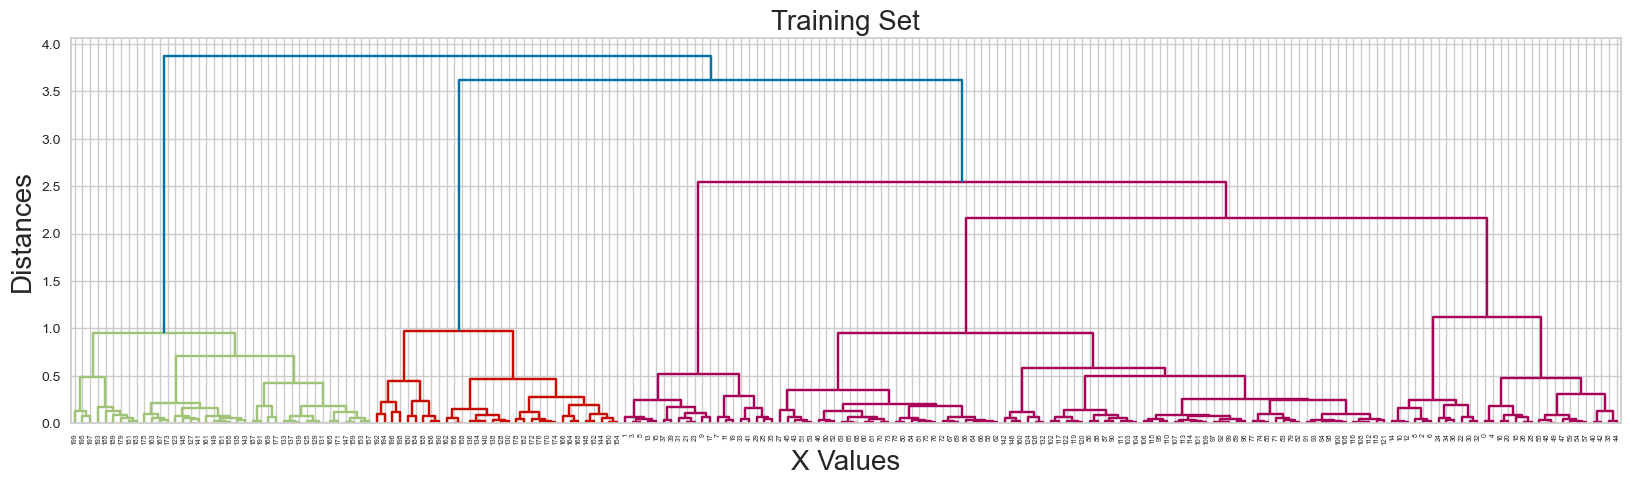

In [53]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [54]:
#number of cluster 5
AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y = AggClusteringModel.fit_predict(X)
y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

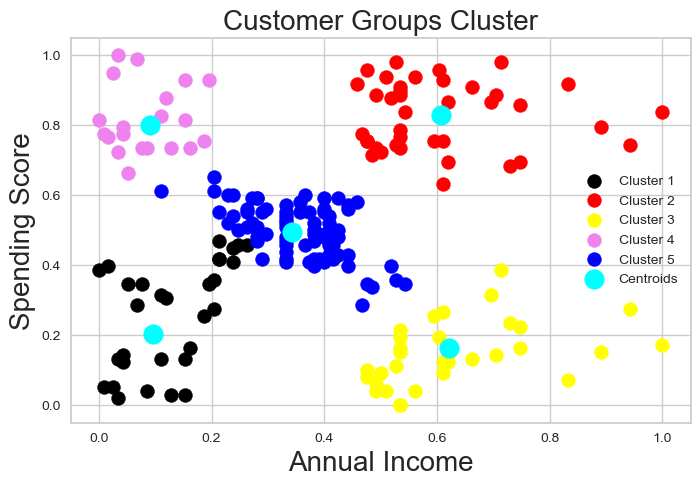

In [55]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[y==0,0], X.iloc[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X.iloc[y==1,0], X.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X.iloc[y==2,0], X.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X.iloc[y==3,0], X.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
plt.scatter(X.iloc[y==4,0], X.iloc[y==4,1], s=100, c='blue', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups Cluster',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

In [56]:
silhouette_score(X, y)

0.5195625721289693

<center>
  <h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid black;">Upvotes</h1>
</center>